## News Article Classification Model

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

import os
print(os.listdir('../code'))
# print(os.listdir('../dataset'))

['.ipynb_checkpoints', 'news-classifier-Copy1.ipynb', 'news-classifier.ipynb']


In [2]:
TRAIN_PATH = os.path.join('../dataset/', 'BBC News Train.csv')

df = pd.read_csv(TRAIN_PATH)
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
"""
    pd.factorize() returns numeric representation of unique values
    in array as param1 and the unique values themselves as param 2
"""
df['category_id'], _ = df['Category'].factorize()
df['category_id'][0 : 10]
df.head(20)

,ArticleId,Text,Category,category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
5,1582,howard truanted to play snooker conservative...,politics,2
6,651,wales silent on grand slam talk rhys williams ...,sport,3
7,1797,french honour for director parker british film...,entertainment,4
8,2034,car giant hit by mercedes slump a slump in pro...,business,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4


In [4]:
category_id_df = df[['Category', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,Category,category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [5]:
category_to_id = dict (category_id_df.values)
id_to_category = dict (category_id_df[['category_id', 'Category']].values)
id_to_category

{0: 'business', 1: 'tech', 2: 'politics', 3: 'sport', 4: 'entertainment'}

In [6]:
category_to_id

{'business': 0, 'tech': 1, 'politics': 2, 'sport': 3, 'entertainment': 4}

In [7]:
df.groupby('Category').category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: category_id, dtype: int64

<AxesSubplot:xlabel='Category'>

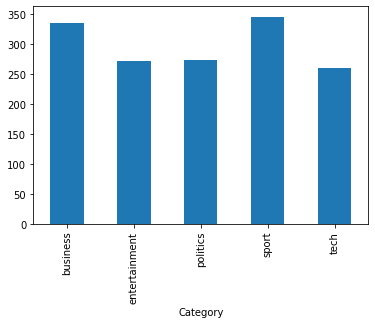

In [8]:
df.groupby('Category').category_id.count().plot.bar()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

"""
    TF-IDF (term frequency-inverse document frequency)
    is a text vectorizer. 
"""

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Text).toarray()

labels = df.category_id

In [10]:
features.shape

(1490, 9927)

In [11]:
category_to_id.items()

dict_items([('business', 0), ('tech', 1), ('politics', 2), ('sport', 3), ('entertainment', 4)])

In [12]:
sorted_category_to_id_items = sorted(category_to_id.items())
sorted_category_to_id_items

[('business', 0),
 ('entertainment', 4),
 ('politics', 2),
 ('sport', 3),
 ('tech', 1)]

In [13]:
labels

0       0
1       0
2       0
3       1
4       0
       ..
1485    4
1486    4
1487    0
1488    1
1489    1
Name: category_id, Length: 1490, dtype: int64

In [14]:
from sklearn.feature_selection import chi2

# We'll look for the top N categories
N = 3

for Category, category_id in sorted_category_to_id_items:
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print(f"# {Category.capitalize()}:")
    print(f"\t. Most correlated unigrams:\n\t. {unigrams[-N:]}")
    print(f"\n\t. Most correlated bigrams:\n\t. {bigrams[-N:]}")
    print('\n')

# Business:
	. Most correlated unigrams:
	. ['growth', 'bank', 'shares']

	. Most correlated bigrams:
	. ['stock market', 'economic growth', 'analysts said']


# Entertainment:
	. Most correlated unigrams:
	. ['singer', 'actor', 'film']

	. Most correlated bigrams:
	. ['won best', 'los angeles', 'box office']


# Politics:
	. Most correlated unigrams:
	. ['blair', 'election', 'labour']

	. Most correlated bigrams:
	. ['prime minister', 'tony blair', 'mr blair']


# Sport:
	. Most correlated unigrams:
	. ['match', 'coach', 'cup']

	. Most correlated bigrams:
	. ['grand slam', 'champions league', 'australian open']


# Tech:
	. Most correlated unigrams:
	. ['technology', 'software', 'users']

	. Most correlated bigrams:
	. ['anti virus', 'mobile phones', 'mobile phone']




In [15]:
features_chi2

(array([0.13345481, 0.01563765, 0.00108776, ..., 0.00812363, 0.15434356,
        0.120306  ]),
 array([0.71487652, 0.9004835 , 0.97368962, ..., 0.92818297, 0.69441858,
        0.72870284]))

In [16]:
from sklearn.manifold import TSNE

SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace = False)
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices])

projected_features.shape

(447, 2)

In [17]:
cat_id = 0
projected_features[(labels[indices] == cat_id).values]

array([[  2.7825692 ,  15.441475  ],
       [ -7.058563  ,  24.184692  ],
       [  1.2346098 ,  30.813969  ],
       [  9.460215  ,  25.276316  ],
       [ 12.25645   , -19.00246   ],
       [  6.5474377 ,  21.924099  ],
       [-14.644814  ,  17.591993  ],
       [  8.358559  ,  21.490097  ],
       [ 15.427329  ,  25.961151  ],
       [ -2.569004  ,  26.837566  ],
       [-11.073658  ,  23.655098  ],
       [  1.5741967 ,  25.727413  ],
       [ 10.370158  ,  11.785584  ],
       [ -2.226906  ,  22.24362   ],
       [  9.479474  ,  27.850174  ],
       [  2.7283478 ,  24.337986  ],
       [ -6.00327   ,  23.208319  ],
       [  7.298235  ,  23.776398  ],
       [  0.46313453,  19.073269  ],
       [-11.076589  ,  16.818588  ],
       [ 18.201622  ,  20.108046  ],
       [ -4.7741823 ,  16.597239  ],
       [  1.3453362 ,  30.60072   ],
       [ -5.342315  ,  21.719809  ],
       [  5.2986484 ,  23.935171  ],
       [ -7.5837154 ,  19.794918  ],
       [ -3.3005261 ,  18.652798  ],
 

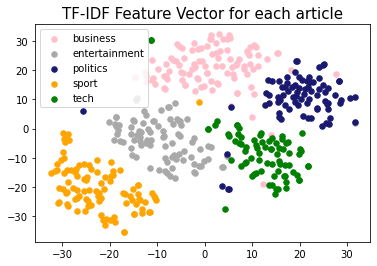

In [18]:
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

for category, category_id in sorted_category_to_id_items:
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
    plt.title("TF-IDF Feature Vector for each article", fontdict=dict(fontsize=15))
    plt.legend()

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

models = [
    RandomForestClassifier(n_estimators=200, max_depth=100, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=30),
    KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    DecisionTreeRegressor(random_state = 0)
]

In [20]:
CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [21]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv = CV)

    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

In [22]:
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

<AxesSubplot:xlabel='model_name', ylabel='accuracy'>

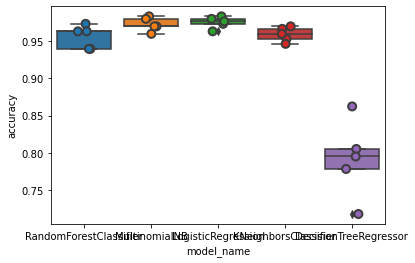

In [23]:
import seaborn as sns

sns.boxplot(x='model_name', y = 'accuracy', data=cv_df)
sns.stripplot(x='model_name', y = 'accuracy', data=cv_df, size = 8, jitter=True, edgecolor='gray', linewidth=2)

In [24]:
cv_df_mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
cv_df_mean_accuracy

model_name
DecisionTreeRegressor     0.791946
KNeighborsClassifier      0.959060
LogisticRegression        0.975168
MultinomialNB             0.972483
RandomForestClassifier    0.955705
Name: accuracy, dtype: float64

In [25]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.939597
1,RandomForestClassifier,1,0.939597
2,RandomForestClassifier,2,0.973154
3,RandomForestClassifier,3,0.963087
4,RandomForestClassifier,4,0.963087
5,MultinomialNB,0,0.969799
6,MultinomialNB,1,0.959732
7,MultinomialNB,2,0.983221
8,MultinomialNB,3,0.979866
9,MultinomialNB,4,0.969799


In [26]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=42)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

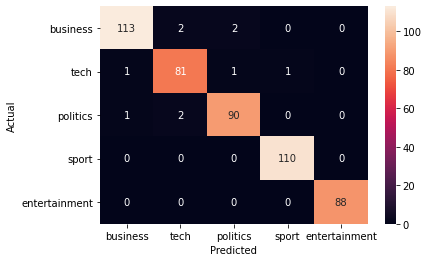

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix (y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=category_id_df.Category.values, yticklabels=category_id_df.Category.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')

In [28]:
texts = ["Hooli stock price soared after a dip in PiedPiper revenue growth.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest data in tech analysis is!"]

In [29]:
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)

for text, predicted in zip(texts, predictions):
    print(f"'{text}'")
    print(f"    - Predicted as: '{id_to_category[predicted]}'")
    print("")

'Hooli stock price soared after a dip in PiedPiper revenue growth.'
    - Predicted as: 'business'

'Captain Tsubasa scores a magnificent goal for the Japanese team.'
    - Predicted as: 'sport'

'Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.'
    - Predicted as: 'politics'

'Beyoncé releases a new album, tops the charts in all of south-east Asia!'
    - Predicted as: 'entertainment'

'You won't guess what the latest data in tech analysis is!'
    - Predicted as: 'tech'



In [30]:
print(os.listdir('../dataset'))

['BBC News Sample Solution.csv', 'BBC News Test.csv', 'BBC News Train.csv']


In [31]:
TEST_PATH = os.path.join('../dataset/', "BBC News Test.csv")

test_df = pd.read_csv(TEST_PATH)
test_df.head()

,ArticleId,Text
0,1018,qpr keeper day heads for preston queens park r...
1,1319,software watching while you work software that...
2,1138,d arcy injury adds to ireland woe gordon d arc...
3,459,india s reliance family feud heats up the ongo...
4,1020,boro suffer morrison injury blow middlesbrough...


In [32]:
test_features = tfidf.transform(test_df.Text.tolist())

Y_pred = model.predict(test_features)

# Y_pred

In [33]:
Y_pred_name = []

for cat_id in Y_pred:
    Y_pred_name.append(id_to_category[cat_id])

Y_pred_name[0:5]

['sport', 'tech', 'sport', 'business', 'sport']

In [34]:
result = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Article Text': test_df['Text'],
    'Category': Y_pred_name
})

In [35]:
result.head(10)

,ArticleId,Article Text,Category
0,1018,qpr keeper day heads for preston queens park r...,sport
1,1319,software watching while you work software that...,tech
2,1138,d arcy injury adds to ireland woe gordon d arc...,sport
3,459,india s reliance family feud heats up the ongo...,business
4,1020,boro suffer morrison injury blow middlesbrough...,sport
5,51,lewsey puzzle over disallowed try england s jo...,sport
6,2025,blair blasts tory spending plans tony blair ha...,politics
7,1479,former ni minister scott dies former northern ...,politics
8,27,career honour for actor dicaprio actor leonard...,entertainment
9,397,tsunami to hit sri lanka banks sri lanka s b...,business
